In [ ]:
import numpy as np 
import pandas as pd 


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df_split = np.array_split(df, 3)


sizeFraudulent = df_split[1].query('fraudulent==1')
sizeNotFraudulent = df_split[1].query('fraudulent==0')
print(len(sizeFraudulent))
print(len(sizeNotFraudulent))

df = df_split[1]

249
5711


In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,8940.500000,0.043624,0.837584,0.514430,0.041779
std,1720.648134,0.204275,0.368863,0.499834,0.200099
min,5961.000000,0.000000,0.000000,0.000000,0.000000
25%,7450.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,1.000000,0.000000
75%,10430.250000,0.000000,1.000000,1.000000,0.000000
max,11920.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

job_id                    0
title                     0
location                158
department             3957
salary_range           5003
company_profile         924
description               0
requirements            805
benefits               2336
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         882
required_experience    2122
required_education     2344
industry               1368
function               1868
fraudulent                0
dtype: int64

In [ ]:
del df['salary_range']
del df['job_id']

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
5960,Sales Executive - Office Equipment,"GB, LND,",NaN,NaN,"SE1, London Bridge - Laserlife, part of the Vi...",You'll need to have at least 12 months office ...,Basic salary of between £18-25K with a progres...,0,0,0,Full-time,Associate,Certification,Business Supplies and Equipment,Sales,0
5961,QA/QC Leader - Cured Meats Co - Chicagoland,"US, IL, Chicago",Quality,ABOUT VERTO Verto Partners is a premier corpor...,Verto Partners has been retained by one of our...,Required Skills/Qualifications:Bachelor's degr...,"The role has a base salary of $60,000 - $80,00...",0,1,1,Full-time,Mid-Senior level,Master's Degree,Food & Beverages,Quality Assurance,0
5962,Vaadin Developer,"BE, , Brussels",NaN,EUROPEAN DYNAMICS (#URL_c66532ffa1ce76ab447da6...,We currently have a vacancy for an Vaadin Deve...,Your skills:University degree in IT or related...,Our offer: If you are seeking a career in an e...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
5963,Application Developer/SQL Server,"US, PA, Pittsburgh",NaN,NaN,Title:Application Developer/SQL ServerLocation...,Has 3+ Years Of Experience In Database Develop...,NaN,0,0,0,Full-time,NaN,Bachelor's Degree,Information Technology and Services,Information Technology,0
5964,Training Assistant,"US, IL, chicago",NaN,NaN,The primary purpose of the job is to design an...,NaN,NaN,0,0,0,Full-time,Entry level,NaN,Computer Software,NaN,0


In [ ]:
df.fillna(" ",inplace = True)

In [ ]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 

In [ ]:
df.text

5960     Sales Executive - Office Equipment  GB, LND,  ...
5961     QA/QC Leader - Cured Meats Co - Chicagoland US...
5962     Vaadin Developer  BE, , Brussels   EUROPEAN DY...
5963     Application Developer/SQL Server US, PA, Pitts...
5964     Training Assistant US, IL, chicago     The pri...
                               ...                        
11915    Post Producer NL, NH, Hilversum Film MediaMonk...
11916    QUALITY ASSURANCE ASSISTANT PH, 07, Cebu Quali...
11917    Frontend Developer GR, E, Volos Tech incredibl...
11918    Sales Research Intern 6 - 12 Months GB, LND, W...
11919    Sr. Design Engineer Mechanical - 3D CAD US, CA...
Name: text, Length: 5960, dtype: object

In [ ]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [ ]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
5960,0,0,0,0,"Sales Executive - Office Equipment GB, LND, ..."
5961,0,1,1,0,QA/QC Leader - Cured Meats Co - Chicagoland US...
5962,0,1,0,0,"Vaadin Developer BE, , Brussels EUROPEAN DY..."
5963,0,0,0,0,"Application Developer/SQL Server US, PA, Pitts..."
5964,0,0,0,0,"Training Assistant US, IL, chicago The pri..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)      

In [ ]:
df.text = df.text.apply(lemmatize_words)

In [ ]:
sizeFraudulent = df.query('fraudulent==1')
sizeNotFraudulent = df.query('fraudulent==0')
print(len(sizeFraudulent))
print(len(sizeNotFraudulent))

249
5711


**The dataset is highly imbalanced**

In [ ]:
train_text , test_text ,train_category , test_category = train_test_split(df.text,df.fraudulent , test_size = 0.2 , random_state = 0)

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_text)
#transformed test reviews
cv_test_reviews=cv.transform(test_text)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (4768, 802099)
BOW_cv_test: (1192, 802099)


In [ ]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(train_text)
#transformed test reviews
tv_test_reviews=tv.transform(test_text)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (4768, 802099)
Tfidf_test: (1192, 802099)


In [ ]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               80210000  
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 80,216,596
Trainable params: 80,216,596
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(cv_train_reviews.toarray(),train_category.toarray() , epochs = 5)

In [ ]:
pred_cv = model.predict(cv_test_reviews)
pred_cv[:5]

array([[7.1561832e-09],
       [2.4738625e-07],
       [2.6828740e-08],
       [1.8830436e-10],
       [5.7307773e-08]], dtype=float32)

In [ ]:
pred_cv = np.around(pred_cv , decimals = 0)
pred_cv[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
accuracy_score(pred_cv,test_category)

0.9765100671140939

In [ ]:
cv_report = classification_report(test_category,pred_cv,target_names = ['0','1'])
print(cv_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3423
           1       0.93      0.49      0.64       153

    accuracy                           0.98      3576
   macro avg       0.95      0.74      0.81      3576
weighted avg       0.98      0.98      0.97      3576



In [ ]:
cm_cv = confusion_matrix(test_category,pred_cv)
cm_cv

array([[3417,    6],
       [  78,   75]])

In [ ]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

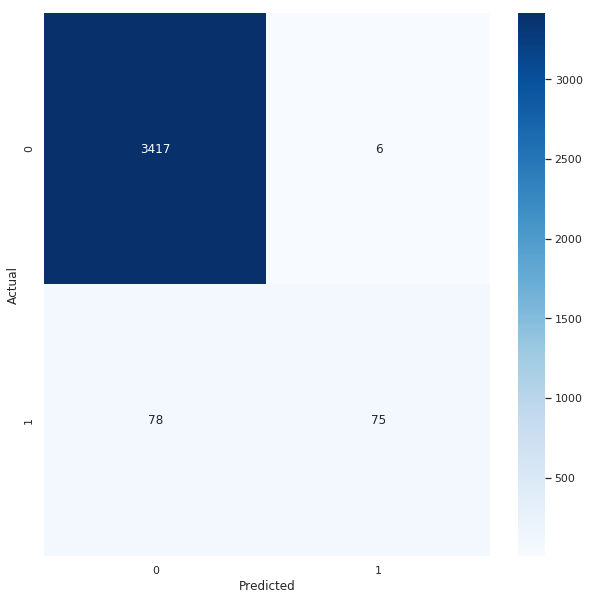

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')